In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import px4tools.ulog
import pandas
import os
import pickle
import scipy.interpolate
import px4tools.version

attempting to monkey patch pandas timedelta series plotting
monkey patch suceeded


In [3]:
pandas.__version__

'0.19.2'

In [4]:
px4tools.version.git_revision

'605ac5bce713b291735e5985495d567a6486a8c7'

In [5]:
d_gyro = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_gyro',
    processing_func=lambda x: x['sensor_gyro_0'].resample('1 s').agg('mean'),
    save_path='./logs/19_19_32-sensor_gyro_0.pkl',
    force_processing=False)[:'4 h']

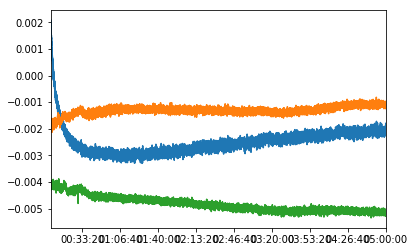

In [6]:
d_gyro.t_sensor_gyro_0__f_x.plot()
d_gyro.t_sensor_gyro_0__f_y.plot()
d_gyro.t_sensor_gyro_0__f_z.plot()

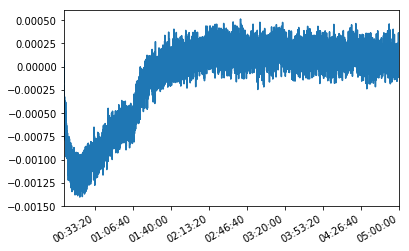

In [7]:
gyro_debiased = (d_gyro.t_sensor_gyro_0__f_x - d_gyro.t_sensor_gyro_0__f_x.ffill().rolling('1 h min').mean().bfill())
gyro_debiased.plot()
gcf().autofmt_xdate()

In [8]:
var = np.sqrt(gyro_debiased['2 h': ].var())
dt = 0.001
sigma_gyro = np.sqrt(var*dt)
sigma_gyro

0.00031978369542952719

In [9]:
np.rad2deg(9.8e-5)

0.0056149863922820677

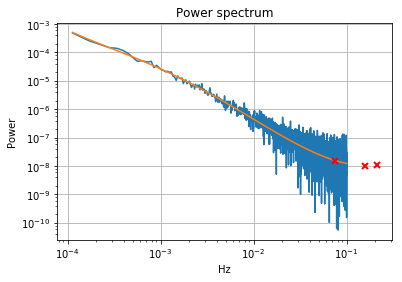

In [10]:
ps_data = px4tools.power_spectrum(d_gyro.t_sensor_gyro_0__f_x, cross_points = (-1, 0, 0.5))

In [11]:
ps_data

{-1: [{'root': 0.075843745155222991, 'val': 1.5557307772745442e-08}],
 0: [{'root': 0.15943118712484086, 'val': 1.0448117107091859e-08}],
 0.5: [{'root': 0.21158121001724595, 'val': 1.1195563514578697e-08}]}

In [12]:
ps_data[0][0]['val']**2*2

2.183263021670111e-16

{'sensor_gyro_0_randomwalk_correlation_time': [2843.3618233354073,
  3799.8812997951936,
  17347.708879408812],
 'sensor_gyro_0_sig_bi': [5.2858992554295035e-05, 0, 2.5840963944894103e-05],
 'sensor_gyro_0_sig_rrw': [1.1969839001707031e-05, 0, 2.1035496366991481e-06],
 'sensor_gyro_0_sig_rw': [9.5435979784303803e-05,
  0.0065408770118045205,
  6.4825353008032382e-05],
 'sensor_gyro_0_tau_0': [1.0059308458721601,
  10360.949869781474,
  0.18636946293245216],
 'sensor_gyro_0_tau_1': [13.786135182735736, nan, 59.52554378190252],
 'sensor_gyro_0_tau_2': [50.728165038762064, nan, 639.85716894481357]}

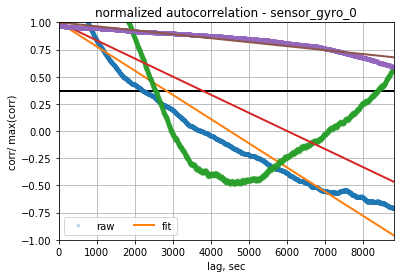

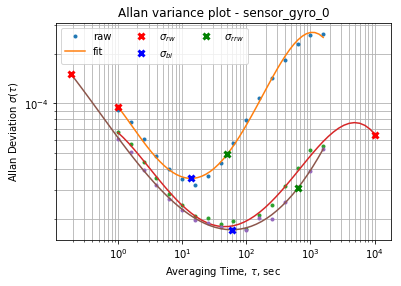

In [13]:
px4tools.ulog.noise_analysis_sensor(
    d_gyro[:'4.99 h'],
    'sensor_gyro_0',
    allan_args={'poly_order':4})

In [14]:
d_accel = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_accel',
    processing_func=lambda x: x['sensor_accel_0'].resample('1 s').agg('mean'),
    save_path='./logs/19_19_32-sensor_accel_0.pkl',
    force_processing=False)

{'sensor_accel_0_randomwalk_correlation_time': [11243.319675737648,
  9728.6584456964792,
  21092.375925990469],
 'sensor_accel_0_sig_bi': [0.00034363462841840282,
  0.00049840529183490655,
  0.0010079717288875203],
 'sensor_accel_0_sig_rrw': [8.1875811879523461e-06,
  2.3622304492300411e-05,
  0.00013773024907659707],
 'sensor_accel_0_sig_rw': [0.0012569923653104086,
  0.0013975340597254828,
  0.0018761076053909402],
 'sensor_accel_0_tau_0': [3.457753718732397,
  3.0981831788595016,
  2.6123860977524238],
 'sensor_accel_0_tau_1': [265.91182321922128,
  102.47095060270331,
  23.593318931677178],
 'sensor_accel_0_tau_2': [20449.431474747151,
  3389.1784672612594,
  213.07903096358842]}

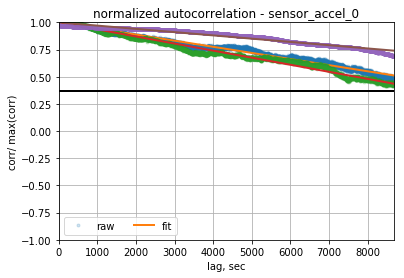

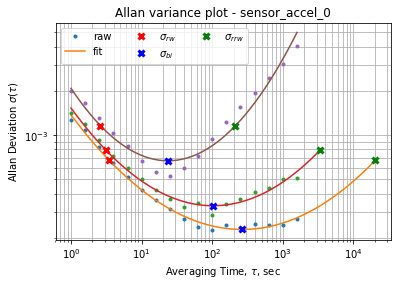

In [15]:
px4tools.ulog.noise_analysis_sensor(
    d_accel[:'4.9 h'],
    'sensor_accel_0',
    allan_args={'poly_order':2})

In [16]:
d_baro = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_baro',
    processing_func=lambda x: x['sensor_baro_0'].resample('100 ms').agg('mean'),
    save_path='./logs/19_19_32-sensor_baro_0.pkl',
    force_processing=False)

{'sig_bi': 0.077206699887699112,
 'sig_rrw': 0.037970096441590301,
 'sig_rw': 0.050906582211858238,
 'tau_0': 0.41799565522739918,
 'tau_1': 2.3221638893189902,
 'tau_2': 12.900720525249199}

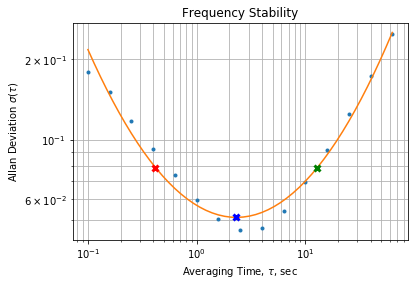

In [17]:
px4tools.ulog.plot_allan_std_dev(d_baro.t_sensor_baro_0__f_altitude,
                                poly_order=2, min_intervals=200)

112414.34288554394

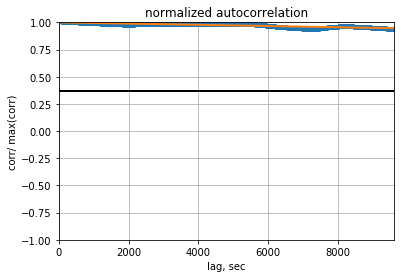

In [18]:
px4tools.ulog.plot_autocorrelation(d_baro.t_sensor_baro_0__f_altitude)

In [19]:
d_mag = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_mag',
    processing_func=lambda x: x['sensor_mag_0'].resample('1 s').agg('mean'),
    save_path='./logs/19_19_32-sensor_mag_0.pkl',
    force_processing=False)

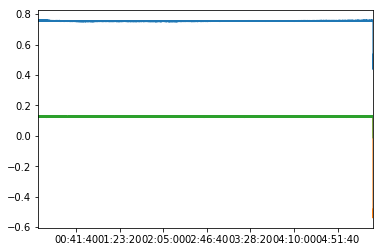

In [20]:
d_mag.t_sensor_mag_0__f_x.plot()
d_mag.t_sensor_mag_0__f_y.plot()
d_mag.t_sensor_mag_0__f_z.plot()

In [21]:
np.sqrt(d_mag.t_sensor_mag_0__f_x**2 + d_mag.t_sensor_mag_0__f_y**2 + d_mag.t_sensor_mag_0__f_z**2).mean()

0.77532960136559226

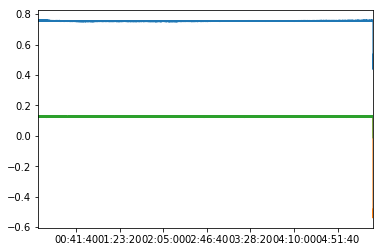

In [22]:
d_mag.t_sensor_mag_0__f_x.plot()
d_mag.t_sensor_mag_0__f_y.plot()
d_mag.t_sensor_mag_0__f_z.plot()

{'sig_bi': 0.00024672417935095589,
 'sig_rrw': 2.5570046490223317e-05,
 'sig_rw': 0.0005963317088016392,
 'tau_0': 4.3388693998998811,
 'tau_1': 40.394014074386916,
 'tau_2': 376.06026424289701}

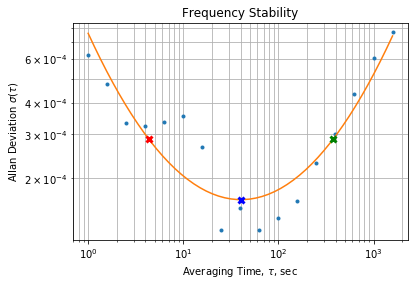

In [23]:
px4tools.ulog.plot_allan_std_dev(d_mag.t_sensor_mag_0__f_x[:'4.99 h'],
                                poly_order=2)

7936.0204451990312

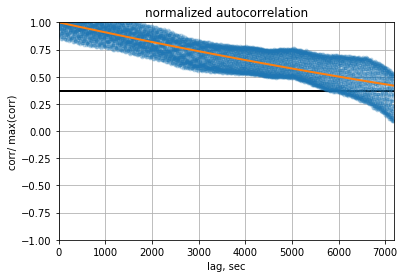

In [24]:
px4tools.ulog.plot_autocorrelation(d_mag.t_sensor_mag_0__f_x['1 h':'4.99 h'],
                                poly_order=2)

In [25]:
d_mag2 = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/01-03-17-mhkabir-pixhawk2.ulg',
    msg_filter='sensor_mag',
    processing_func=lambda x: x['sensor_mag_0'].resample('1 s').agg('mean'),
    save_path='./logs/01-03-17-mhkabir-pixhawk-mag-0.pkl',
    force_processing=False)

In [26]:
mag_norm = np.linalg.norm(
    np.vstack([d_mag2.t_sensor_mag_0__f_x.ffill(),
               d_mag2.t_sensor_mag_0__f_y.ffill(),
               d_mag2.t_sensor_mag_0__f_z.ffill()]), axis=0)
mag_norm.mean()

0.35440557493469005

{'sig_bi': 0.003313453213311386,
 'sig_rrw': 0.00015401124174507319,
 'sig_rw': 0.0044295759897687885,
 'tau_0': 0.32926360274857808,
 'tau_1': 49.816173049018161,
 'tau_2': 7536.9736482677217}

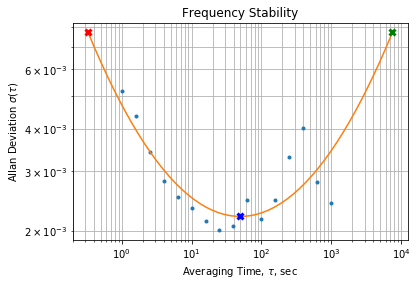

In [27]:
px4tools.ulog.plot_allan_std_dev(d_mag2.t_sensor_mag_0__f_x[:'4.99 h']/mag_norm.mean(),
                                poly_order=2)

1105.8831671525481

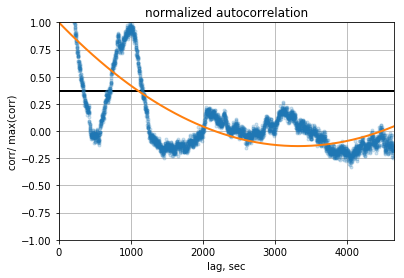

In [28]:
px4tools.ulog.plot_autocorrelation(
    d_mag2.t_sensor_mag_0__f_x['1 h':'4.99 h'], poly_order=2)

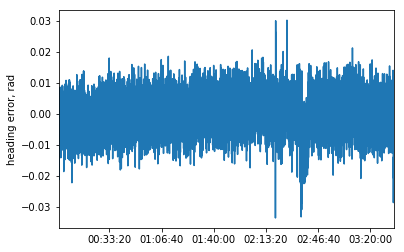

In [29]:
d_mag = d_mag2['1 m': '4 h']
B_b = np.array([
        d_mag.t_sensor_mag_0__f_x.ffill(),
        d_mag.t_sensor_mag_0__f_y.ffill(),
        d_mag.t_sensor_mag_0__f_z.ffill()]).T
B_b_mean = B_b.mean(axis=0)
B_b_mean[2] = 0
B_b[:,2] = 0
mag_heading_error = pandas.Series(
    np.arcsin(np.cross(B_b_mean, B_b)[:,2]/np.linalg.norm(B_b, axis=1)/np.linalg.norm(B_b_mean)),
    d_mag.index, name='heading error')
mag_heading_error.plot()
ylabel('heading error, rad')

{'sig_bi': 0.0019473090818523608,
 'sig_rrw': 3.3468827414316904e-05,
 'sig_rw': 0.0053460502499651447,
 'tau_0': 1.0544554943849103,
 'tau_1': 276.66432821590126,
 'tau_2': 72590.214489617196}

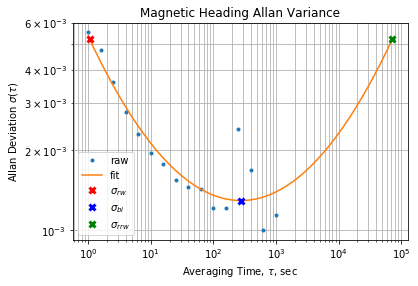

In [30]:
res_mag = px4tools.plot_allan_std_dev(mag_heading_error)
legend()
title('Magnetic Heading Allan Variance')
res_mag

1367.6108479458505

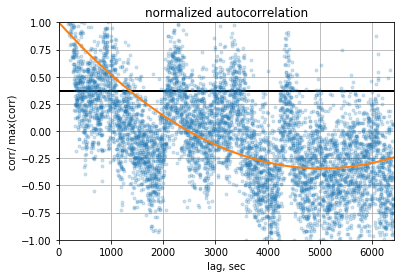

In [31]:
px4tools.ulog.plot_autocorrelation(
    mag_heading_error, poly_order=2)